In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns

In [37]:
def calculaCDF(df, coluna, titulo = 'CDF of Mean Toxicity for Each Platform'):
    plt.figure(figsize=(10, 6))
    unique_item = df[coluna].unique()
    
    for unique in unique_item:
        # Select rows for the current platform
        platform_data = df[df[coluna] == unique]
        # Calculate CDF
        x = np.sort(platform_data['meanToxicity'])
        y = np.arange(1, len(x) + 1) / len(x)
        # Plot CDF
        plt.plot(x, y, label=unique)
    
    plt.xlabel('Toxicidade Média')
    plt.ylabel('Probabilidade Cumulativa')
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
semAtaque = pd.read_csv('livreAtaque.csv')
ataque = pd.read_csv('sofreuAtaque.csv')


dfJogos = pd.read_csv('Jogos.csv')
dfUsuarios = pd.read_csv('data-sets/game_reviews_users.csv')
dfUsuarios = dfUsuarios[dfUsuarios['Toxicity'] > 0]

# Exibir a contagem de valores nulos por coluna
dfJogos.fillna(0, inplace=True)

C:\Users\cotoq\AppData\Local\Temp\ipykernel_16876\3156324554.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfUsuarios = pd.read_csv('data-sets/game_reviews_users.csv')


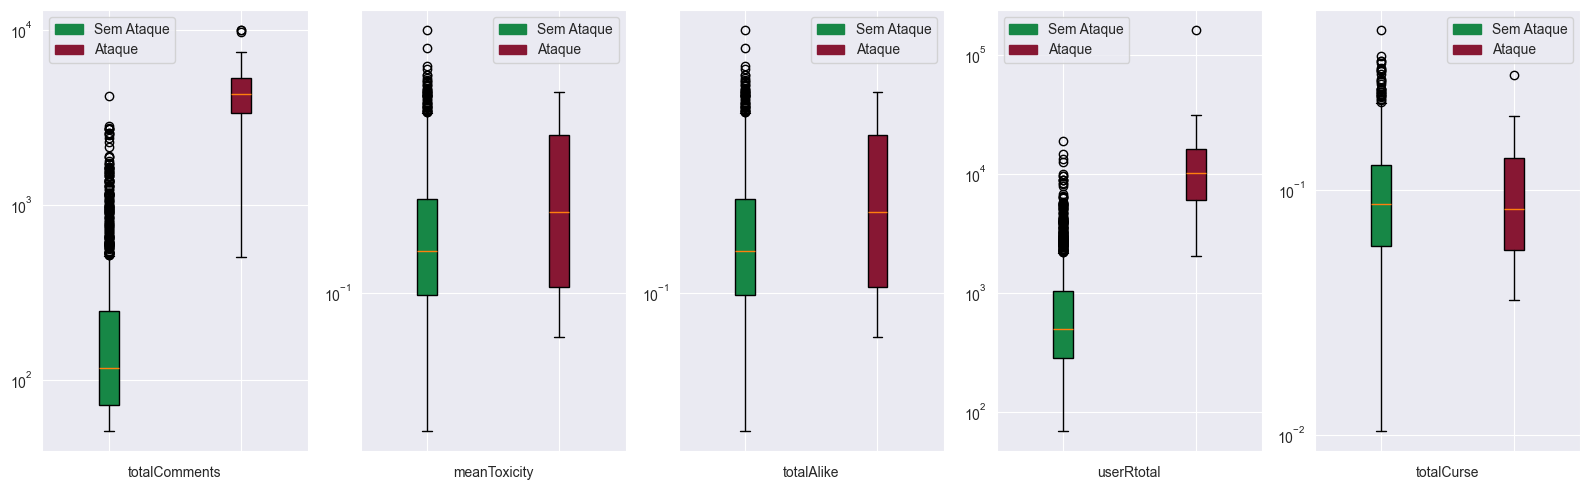

In [39]:
''''
LEGEND_SIZE = 21
LABEL_SIZE = 23
TICK_SIZE = 16
SMALL_SIZE = 19
MEDIUM_SIZE = 27    
BIGGER_SIZE = 33
plt.rc('axes',   titlesize=SMALL_SIZE)  
plt.rc('axes',   labelsize=LABEL_SIZE)   
plt.rc('xtick',  labelsize=TICK_SIZE) 
plt.rc('ytick',  labelsize=TICK_SIZE)   
plt.rc('legend', fontsize=LEGEND_SIZE)   
plt.rc('figure', titlesize=MEDIUM_SIZE)
'''''

#Mudar a proporção, label, e legenda
variables = ['totalComments', 'meanToxicity', 'totalAlike', 'userRtotal', 'totalCurse']

# Criando o boxplot para cada variável
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(16, 5))

# Definindo cores
colors = ['#178746', '#871733']

valoresAtaque = ['4565.16', '0.158', '8.301', '16285.6', '0.103']
valoresSemAtaque = ['242.47', '0.126', '0.193', '947.4', '0.096']

for i, var in enumerate(variables):
    # Extraindo os dados para cada variável
    if(var != 'totalAlike'):
        temp1 = semAtaque[semAtaque[var] >0]
        temp2 = ataque[ataque[var] >0]
        data_sem_ataque = temp1[var]
        data_ataque = temp2[var]
    
    
    # Adicionando dados ao boxplot
    boxplot = axs[i].boxplot([data_sem_ataque, data_ataque], labels=['Sem Ataque', 'Ataque'], patch_artist=True)

    # Adicionando escala logarítmica ao eixo Y
    axs[i].set_yscale('log')
    axs[i].set_xticklabels([])
    # Definindo as cores
    for box, color in zip(boxplot['boxes'], colors):
        box.set_facecolor(color)

    legend_patches = [
            mpatches.Patch(color=colors[0], label=f'Sem Ataque'),
            mpatches.Patch(color=colors[1], label=f'Ataque')
        ]
    axs[i].legend(handles=legend_patches)
    axs[i].set_xlabel(var)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [40]:
dfJogos['platform'] = dfJogos['plataforms'].str.split(', ')
dfJogos = dfJogos[dfJogos['meanToxicity'] > 0]
# Explode the DataFrame to separate rows for each platform
dfPlatform = dfJogos.explode('platform')
dfPlatform['platform'] = dfPlatform['platform'].str.replace(r"[\[\]']", "", regex=True)
# Get unique platforms
unique_platforms = dfPlatform['platform'].unique()
print(unique_platforms)

['PlayStation 4' 'Nintendo Switch' 'PC' 'Xbox Series X' 'PlayStation 3'
 'PlayStation Vita' 'Wii U' 'Xbox One' 'Xbox 360' 'PlayStation 2'
 'Game Boy Advance' 'GameCube' 'Xbox' 'DS' 'iOS (iPhone/iPad)' 'PSP'
 'PlayStation' 'PlayStation 5' '3DS' 'Wii' 'Nintendo 64' 'Dreamcast' nan]


In [41]:
platform_mapping = {
    'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation',
    'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation',
    'PlayStation Vita': 'PlayStation',
    'PlayStation': 'PlayStation',
    'PlayStation 5': 'PlayStation',
    
    'Xbox Series X': 'Xbox',
    'Xbox One': 'Xbox',
    'Xbox 360': 'Xbox',
    'Xbox': 'Xbox',

    'iOS (iPhone/iPad)': 'Mobile',
    'PC': 'PC',

    'GameCube': 'Nintendo',
    'Wii U': 'Nintendo',
    'Game Boy Advance': 'Nintendo',
    'DS': 'Nintendo',
    'Nintendo Switch': 'Nintendo',
    '3DS': 'Nintendo',
    'Wii': 'Nintendo',
    'Nintendo 64': 'Nintendo',
    
    'Dreamcast': 'Sega'
}
dfPlatform['platform'] = dfPlatform['platform'].replace(platform_mapping)

In [42]:
dfPlatform = dfPlatform[~dfPlatform['platform'].isin(['Dreamcast', 'iOS (iPhone/iPad)', 'Sega', 'Mobile'])]

In [43]:
print(dfPlatform['platform'].value_counts())

platform
PlayStation    9508
PC             7991
Xbox           6331
Nintendo       6227
Name: count, dtype: int64


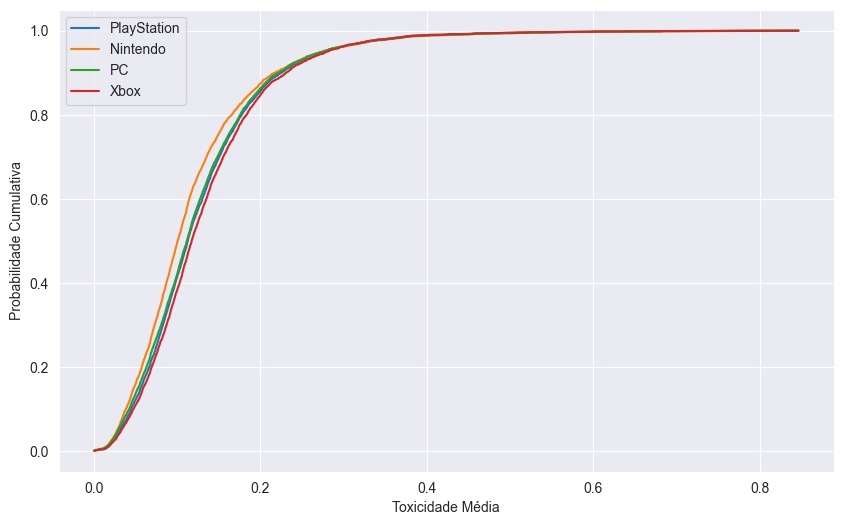

In [44]:
dfPlatform = dfPlatform.dropna()
calculaCDF(dfPlatform, 'platform')

In [45]:
print(dfJogos['Genre'].unique())

['["Horizontal Shoot-\'Em-Up"]' "['3D Platformer']" "['Metroidvania']"
 "['Defense']" "['Team Sports']" "['2D Platformer']" "['Action RPG']"
 "['Auto Racing']" "['Light Gun']" "['Survival']" "['Tycoon']"
 "['Action Puzzle']" "['Action Adventure']" "['Aircraft Sim']"
 "['Trivia']" "['Adventure']" "['Puzzle']" "['JRPG']" "['2D Fighting']"
 "['Turn-Based Tactics']" "['Point-and-Click']" "['Western RPG']"
 "['Management']" "['Third-Person Adventure']" "['Rhythm']"
 "['Visual Novel']" "['MMORPG']" "['Real-Time Strategy']"
 "['Virtual Pet']" "['Open-World Action']" "['Board']"
 '["Top-Down Shoot-\'Em-Up"]' "['Party']" "['FPS']" "['Basketball Sim']"
 "['Compilation']" "['Aircraft Combat Sim']" "['4X Strategy']"
 "['Auto Racing Sim']" "['Virtual Life']" "['Space Combat Sim']"
 "['Sandbox']" "['Tactical FPS']" "['Strategy']" "['Arcade']"
 "['Marine Combat Sim']" "['First-Person Adventure']" "['Golf']" "['RPG']"
 "['Application']" "['Train Sim']" "['Cricket']" '["2D Beat-\'Em-Up"]'
 "['Third Per

In [46]:
genre_mapping = {
    'Ação': ['Action RPG', 'Action Adventure', 'Action', 'Linear Action Adventure', 'Roguelike', "2D Beat-'Em-Up",'3D Fighting', '2D Fighting', "3D Beat-'Em-Up"],
    'Aventura': ["Adventure", 'Adventure', 'Point-and-Click', 'Third-Person Adventure',  'Text Adventure', 'Metroidvania', '3D Platformer', 'Plataform', '2D Platformer'],
    'Tiro': ['Horizontal Shoot-Em-Up', 'First-Person Adventure', "Horizontal Shoot-\'Em-Up", 'Top-Down Shoot-Em-Up', 'FPS (First-Person Shooter)', 'Tactical FPS', 'Third Person Shooter', 'Tactical Third Person Shooter', 'Rail Shooter', 'Light Gun', "Vertical Shoot-'Em-Up", "Top-Down Shoot-'Em-Up", 'FPS'],
    'Esportes': ['Team Sports', 'Basketball Sim', 'Football Sim', 'Biking', 'Combat Sport', 'Soccer Management', 'Golf', 'Cricket', 'Tennis', 'Soccer', 'Hockey', 'Skating', 'Basketball', 'Football', 'Hockey Sim', 'Bowling', 'Surfing', 'Baseball', 'Rugby', 'Volleyball', 'Soccer Sim', 'Golf Sim', 'Skiing', 'Soccer Sim', 'Hockey Sim', 'Billiards', 'Future Sport', 'Individual Sports', 'Sports', 'Exercise'],
    'Corrida': ['Auto Racing', 'Auto Racing Sim', 'Arcade Racing', 'Future Racing', 'Racing', 'Racing Sim', 'Horse Racing', 'Space Combat Sim', 'Baseball Sim'],
    'Simulação': ['Management', 'Virtual Pet', 'Open-World Action', 'Space Sim', 'Marine Sim', 'Train Sim', 'Aircraft Sim', 'Vehicle Sim', 'Marine Combat Sim', 'Aircraft Combat Sim', 'Vehicle Combat Sim'],
    'Estratégia': ['Real-Time Strategy', 'Turn-Based Tactics', 'Turn-Based Strategy', 'Command RTS', 'Real-Time Tactics', '4X Strategy','Strategy', 'Tycoon'],
    'Puzzle': ['Puzzle', 'Stacking Puzzle', 'Logic Puzzle', 'Matching Puzzle', 'Pinball', 'Trivia', 'Action Puzzle'],
    'RPG': ['JRPG (Japanese Role-Playing Game)', 'Western RPG', 'RPG', 'Trainer RPG', 'MMORPG', 'Virtual Career', 'JRPG'],
    'Outros': ['Survival', 'Party', 'Arcade', 'Dancing', 'Fishing', 'Exercise' 'Billiards', 'Wrestling', 'Athletics', 'Visual Novel', 'Rhythm', 'Card Battle', 'Artillery', 'Hunting', 'Gambling', 'Hidden Object','Edutainment', 'Simulation', 'Board', 'Defense', 'Virtual Life', 'Compilation', 'Sandbox', 'Application', 'Miscellaneous', 'MOBA'],
}

# Aplicar o mapeamento dos gêneros de jogos para categorias mais amplas
def map_genre(genres):
    for genre in eval(genres):
        for category, subgenres in genre_mapping.items():
            if genre in subgenres:
                return category
    return genres
dfGenre = dfJogos
dfGenre['Genre'] = dfJogos['Genre'].apply(map_genre)

In [47]:
print(dfGenre['Genre'].value_counts())

Genre
Ação          2360
Aventura      1821
Outros        1727
Tiro          1625
Estratégia    1274
RPG            955
Corrida        726
Simulação      667
Esportes       539
Puzzle         490
Name: count, dtype: int64


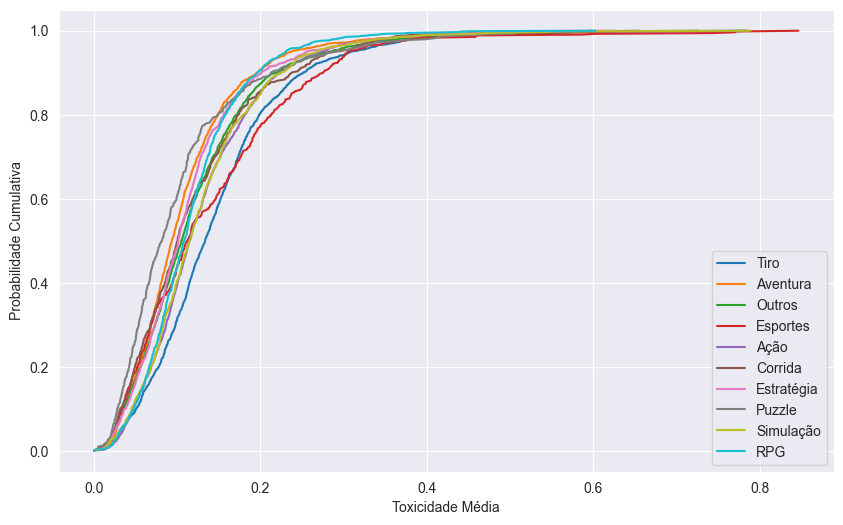

In [48]:
calculaCDF(dfGenre, 'Genre')

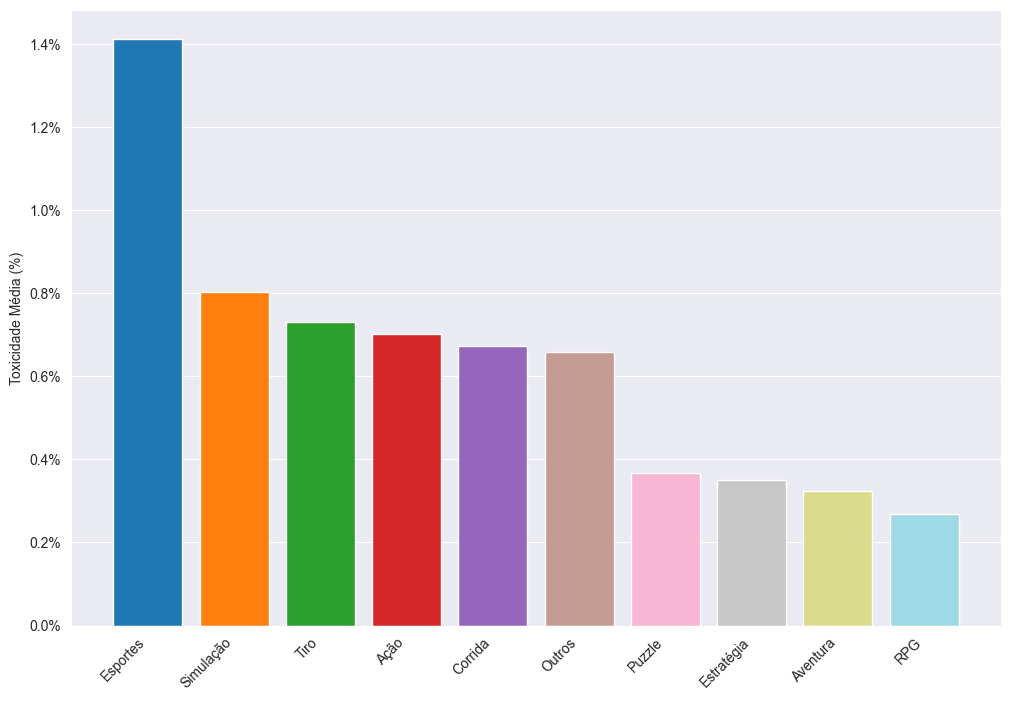

In [49]:
genre_mean_toxicity = dfGenre.groupby('Genre')['comentariosToxicos/Total'].mean().sort_values(ascending=False)

# Convertendo os valores para porcentagem
genre_mean_toxicity_percentage = genre_mean_toxicity * 100

# Plotando o gráfico de barras
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(genre_mean_toxicity_percentage)))
bars = plt.bar(genre_mean_toxicity_percentage.index, genre_mean_toxicity_percentage, color=colors)

# Adicionando título e rótulos
plt.ylabel('Toxicidade Média (%)')

# Formatando o eixo Y para mostrar porcentagem
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='x')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


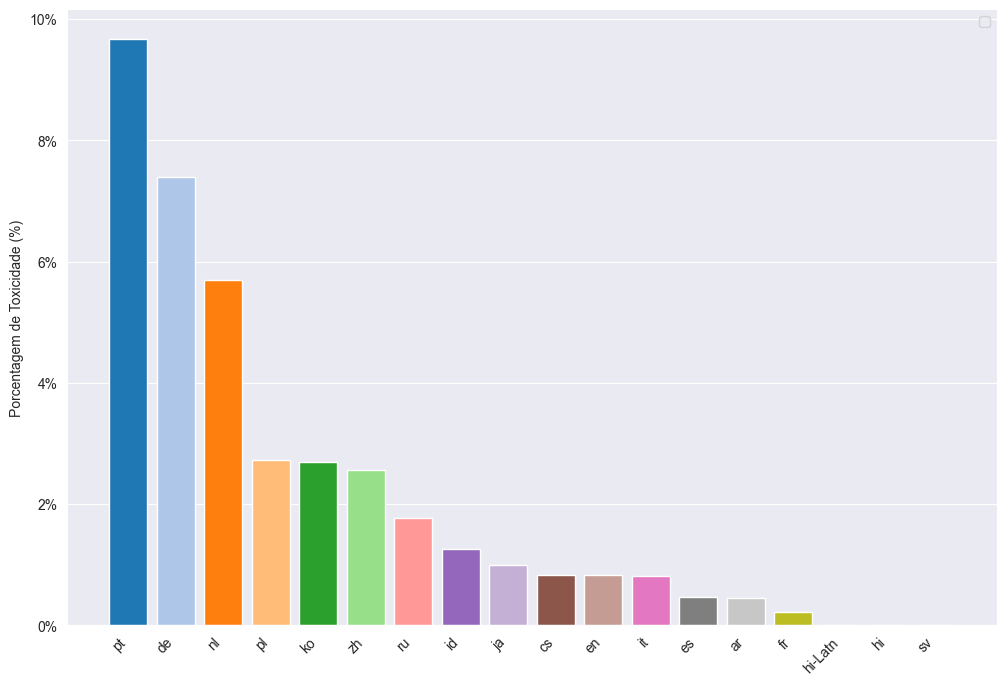

In [50]:
#comentários tóxicos por linguagem
dfLanguage = dfUsuarios
dfLanguage['Toxicity'] = np.where(dfUsuarios['Toxicity'] > 0.7, 1, 0)

language_mean_toxicity = dfLanguage.groupby('Language')['Toxicity'].mean().sort_values(ascending=False) * 100

# Plotando o histograma
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(language_mean_toxicity)))
bars = plt.bar(language_mean_toxicity.index, language_mean_toxicity, color=colors)

# Adicionando título e rótulos
plt.ylabel('Porcentagem de Toxicidade (%)')

# Formatando o eixo Y para mostrar porcentagem com três casas decimais
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Adicionando uma legenda (se necessário)
# for bar, color, label in zip(bars, colors, language_mean_toxicity.index):
#     bar.set_label(label)

plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x')

plt.show()

In [51]:
dfPT = dfLanguage[dfLanguage['Language'] == 'pt']

print(len(dfPT))
print(len(dfPT[dfPT['Toxicity'] == 1]))

14960
1448


In [52]:
def count_first_review(reviews):
    try:
        return len(reviews[0])
    except:
        return 0

In [53]:
dfAll = pd.read_json('data-sets/all_games_data.json')
dfAll['numComentarios'] = dfAll['userReviews'].apply(count_first_review)


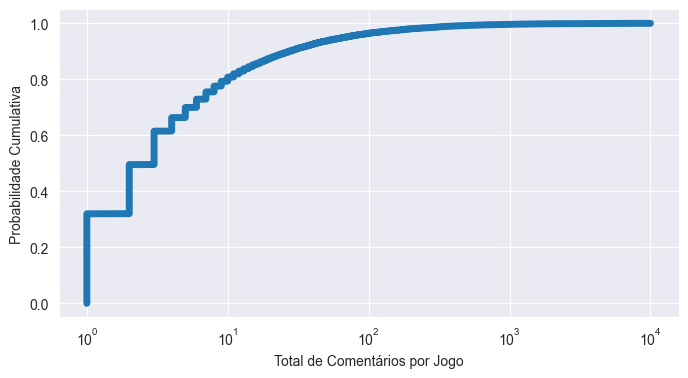

In [54]:
dfAll = dfAll[dfAll['numComentarios'] > 0]
dfAll = dfAll.sort_values(by='numComentarios')

# Calcular a CDF
n = len(dfAll)
cdf = np.arange(1, n + 1) / n

# Plotar a CDF
plt.figure(figsize=(8, 4))
plt.plot(dfAll['numComentarios'], cdf, linewidth=5, linestyle='-')
plt.xscale('log')  # Define o eixo X em escala logarítmica
plt.xlabel('Total de Comentários por Jogo')
plt.ylabel('Probabilidade Cumulativa')
plt.grid(True)
plt.show()

In [55]:
print(len(dfAll))
print(len(dfAll[dfAll['numComentarios'] == 0]))
print(len(dfAll[(dfAll['userscore'] == -1) | (dfAll['metascore'] == -1)]))

26558
0
14357


In [56]:
dfTodosUsuarios = pd.read_csv('data-sets/game_reviews.csv')
print(dfTodosUsuarios['user'].nunique() )
#Amadores
dfAmadores = dfTodosUsuarios[dfTodosUsuarios['userType'] == 0]
print(dfAmadores['user'].nunique() )
#Profissionais
dfProfissionais = dfTodosUsuarios[dfTodosUsuarios['userType'] == 1]
print(dfProfissionais['user'].nunique())

print("----------")
print(len(dfTodosUsuarios))
print(len(dfAmadores))
print(len(dfProfissionais))


333624
333467
3097
----------
1017504
669277
348227


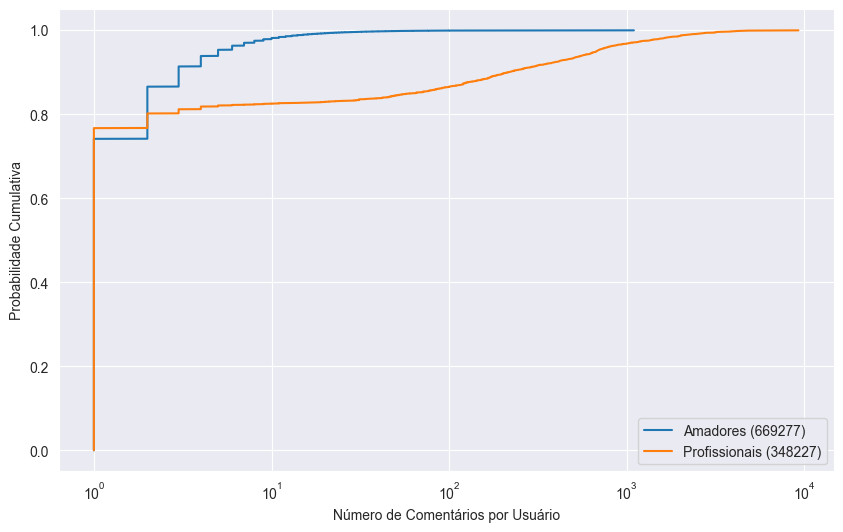

In [57]:
amadores_user_counts = dfAmadores['user'].value_counts()
profissionais_user_counts = dfProfissionais['user'].value_counts()

# Calcular a CDF para cada grupo
def compute_cdf(data):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, yvals

amadores_sorted, amadores_cdf = compute_cdf(amadores_user_counts)
profissionais_sorted, profissionais_cdf = compute_cdf(profissionais_user_counts)

# Plotar as CDFs
plt.figure(figsize=(10, 6))
plt.plot(amadores_sorted, amadores_cdf, label='Amadores (669277)')
plt.plot(profissionais_sorted, profissionais_cdf, label='Profissionais (348227)')

plt.xlabel('Número de Comentários por Usuário')
plt.ylabel('Probabilidade Cumulativa')
plt.xscale('log')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()

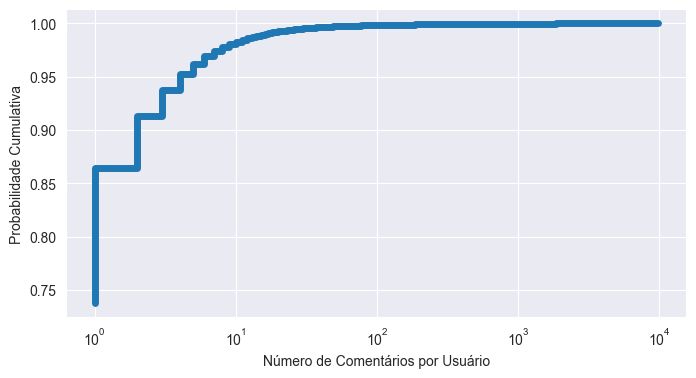

In [58]:

# Contar quantos comentários cada usuário fez
user_counts = dfTodosUsuarios['user'].value_counts()

# Calcular a distribuição cumulativa
cdf = user_counts.value_counts(normalize=True).sort_index().cumsum()

# Plotar a CDF
plt.figure(figsize=(8, 4))
cdf.plot(drawstyle='steps-pre', linewidth=5)
plt.xscale('log')
plt.xlabel('Número de Comentários por Usuário')
plt.ylabel('Probabilidade Cumulativa')
plt.grid(True)
plt.show()